# K-Neighbors Classifier

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [23]:
X, y = load_iris(return_X_y=True)
x_col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_col_name = ['species']
classes = ['Setosa', 'Versicolour', 'Virginica']
X = pd.DataFrame(X, columns=x_col_names )
y = pd.DataFrame(y, columns=y_col_name)

In [24]:
data = X.join(y)

In [25]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Text(0, 0.5, 'Accuracy')

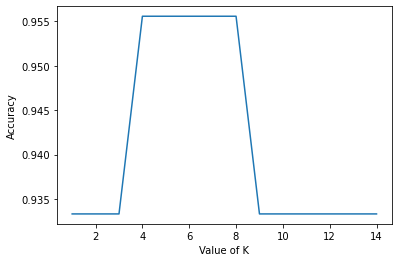

In [27]:
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:    
    classifier = KNeighborsClassifier(n_neighbors=k)
    pipe = make_pipeline(StandardScaler(), classifier)

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [28]:
## Let's choose k=4
classifier = KNeighborsClassifier(n_neighbors=4)
pipe_4 = make_pipeline(StandardScaler(), classifier)
pipe_4.fit(X_train, y_train)
y_pred = pipe_4.predict(X_test)
result = metrics.confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[22  0  0]
 [ 0 15  0]
 [ 0  2  6]]


In [29]:
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.88      1.00      0.94        15
           2       1.00      0.75      0.86         8

    accuracy                           0.96        45
   macro avg       0.96      0.92      0.93        45
weighted avg       0.96      0.96      0.95        45

